In [ ]:
import wave
import sys

import pyaudio
from src.utils.system_utils import create_folder_structure
from src.utils.audio_utils import record_audio_chunk, concatenate_stream, download_mp3, start_continuous_recording, crop_wav, enhance_audio_signal, speach_activity_detection
from modules.whisper import load_model, transcribe_audio
from modules.pyannote import embedding_cosine_similarity, get_embedding_model, get_pyannote_access_token, get_pyannote_pipeline, get_diarization_speaker_info_df

In [ ]:
#record_audio_chunk(3)
## declarations

In [ ]:
#torch.cuda.is_available()
#DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
#DEVICE

### chose to load model with processing device either cpu or gpu

In [ ]:
#MODEL_TYPE = "base.en"
#model = whisper.load_model(MODEL_TYPE, device=DEVICE)
#print(
#    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
#    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
#)

model = load_model()

In [ ]:
file_name = "audio/full_audio/full_audio.wav"
current_caption = transcribe_audio(model, file_name)
current_caption

In [ ]:
import requests
import tempfile

In [ ]:
AUDIO_URL = "https://www.listennotes.com/podcast-clips/369-paul-rosolie-amazon-jungle-uncontacted-z5w0HVahToE/" 

download_mp3(AUDIO_URL, "lex-fridman.mp3")

In [ ]:
#loop through files

import os
directory = 'audio/chunks/'
list_test = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f):
        current_caption = transcribe_audio(model, f)
        print("list of data:", current_caption[0])
        list_test.append(current_caption[0])
        #print(f"file:{f} id:{current_caption['id']} \n transcribed-text:{current_caption['text']} start: {current_caption['start']} , end: {current_caption['end']}")

current_caption[1]
## make sure full_audio exists
## if yes concatenate with it, if not create a full_audio with file that is empty and concatenate with it 
#concatenate_stream("audio/chunks/1_voice_chunk.wav", "audio/chunks/2_voice_chunk.wav")

In [ ]:
current_caption[0][0].get_text()

In [ ]:
print(list_test[3][1])

In [ ]:
for entry in list_test:
    print(entry)
    print("\n")

In [ ]:
len(os.listdir(directory))

In [ ]:
file_name = "lex-fridman.mp3"

current_caption = transcribe_audio(model, file_name) #only in maximum 30 seconds sliding windows.
current_caption

In [ ]:
from pydub import AudioSegment
#pip install pydub

In [ ]:
def convert_mp3_to_wav(mp3_fname, output_file_name=None): 
    sound = AudioSegment.from_mp3(mp3_fname)
    
    if output_file_name:
       temp_file_name = output_file_name
       sound.export(output_file_name, format="wav")

    else:
        #create temp file
        temp_file = tempfile.NamedTemporaryFile(suffix=".wav", delete=False)
        temp_file_name = temp_file.name
        sound.export(temp_file_name, format="wav")

    return temp_file_name

## Transform the mp3 to wav


In [ ]:
#wav_file_name = convert_mp3_to_wav("audio/podcast/lex_ai_neil_gershenfeld.mp3", "audio/podcast/lex_ai_neil_gershenfeld.wav")

In [ ]:
sound = AudioSegment.from_mp3("audio/podcast/lex_ai_neil_gershenfeld.mp3")
output_path = "audio/podcast/"
sound.export(output_path, format="wav")

create folder structure

In [ ]:
from pydub import AudioSegment

def initialize_folders():
    root_folder = 'test/audio'
    audio_subfolders = ['chunks', 'temp', 'speaker_segments', 'temp/temp_speaker_segements', 'temp/normalized_audio', 'temp/merged_audio']

    for folder in audio_subfolders:
        create_folder_structure(root_folder, folder)

In [ ]:
folder_path

In [ ]:
def create_silent_1sec_wav(file_path):
    # Create an empty audio segment (1 second of silence)
    empty_audio = AudioSegment.silent(duration=1000, frame_rate=16000)  # 1000 milliseconds = 1 second

    # Export the empty audio segment as a .wav file
    empty_audio.export(file_path, format="wav")

In [ ]:
MERGED_FILE_PATH = 'test/audio/temp/merged_audio/output_normalized_audio.wav'
create_silent_1sec_wav(MERGED_FILE_PATH)

In [ ]:
import os
def delete_specific_file(file_path):
    try:
        # Attempt to delete the file
        os.remove(file_path)
        print(f"Deleted: {file_path}")
    except FileNotFoundError:
        print(f"The file {file_path} does not exist.")
    except Exception as e:
        print(f"Error deleting {file_path}: {str(e)}")

In [ ]:
import os
# List all files and subdirectories in the folder
def delete_folder_files(folder_path):
    # List all files and subdirectories in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                # Delete the file
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {str(e)}")

In [ ]:
import shutil
def copy_to(source_file, destination_folder):
    try:
    # Copy the file to the destination folder
        shutil.copy(source_file, destination_folder)
        print(f"File copied from {source_file} to {destination_folder}")
    except FileNotFoundError:
        print(f"The source file {source_file} does not exist.")
    except Exception as e:
        print(f"Error copying the file: {str(e)}")

In [ ]:
def merge_audio(merge_wav_path, file_path):
    # Load the existing 'merge.wav' file
    merge_audio = AudioSegment.from_wav(merge_wav_path)

    audio_to_merge = AudioSegment.from_wav(file_path)
    merge_audio += audio_to_merge

    # Export the merged audio to 'test/temp/merge_audio/merge.wav'
    merge_audio.export(merge_wav_path, format="wav")

In [ ]:
delete_folder_files('audio/temp/merged_audio/')

#### itialize software and get all models

##### Get .env variables  

In [1]:
import modules.pyannote as pyannote
import modules.whisper as whisper
import src.utils.audio_utils as audio_utils
import src.utils.system_utils as system_utils

In [ ]:
dotenv_path = './venv/env_variables.env'
PYANNOTE_ACCESS_TOKEN = pyannote.get_pyannote_access_token(dotenv_path)
PYANNOTE_ACCESS_TOKEN

##### Load transcription model 

In [ ]:
#MODEL_TYPE = "base.en"
#model = whisper.load_model(MODEL_TYPE, device=DEVICE)
#print(
#    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
#    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
#)

model = whisper.load_model()

##### Load annotation pipeline

In [ ]:
pyannote_pipeline = pyannote.get_pyannote_pipeline(pyannote_access_token=PYANNOTE_ACCESS_TOKEN)

##### Load speaker embedding model

In [ ]:
embedding_model = pyannote.get_embedding_model(PYANNOTE_ACCESS_TOKEN)

##### Continous Audio recording using circular buffer to prevent segement (data) loss

In [ ]:
#start_continuous_recording()

#

In [ ]:
import modules.whisper as whisper

In [ ]:
whisper.test(pyannote_pipeline)

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from PyQt5.QtWidgets import QApplication, QMainWindow, QPushButton, QVBoxLayout, QWidget, QLabel
from PyQt5.QtCore import Qt, QTimer


class SoundWaveWidget(FigureCanvas):
    def __init__(self, parent=None, width=5, height=2, dpi=100):
        self.figure, self.ax = plt.subplots(figsize=(width, height), dpi=dpi)
        super().__init__(self.figure)
        self.setParent(parent)
        self.plot_sound_wave()

    def plot_sound_wave(self):
        t = np.linspace(0, 1, 1000)
        wave = np.sin(2 * np.pi * 440 * t)
        self.ax.plot(t, wave)
        self.ax.set_axis_off()


class DarkThemeUI(QMainWindow):
    def __init__(self):
        super().__init__()

        self.setWindowTitle("Dark UI with Sound Wave")
        self.setGeometry(100, 100, 800, 600)
        self.setStyleSheet("background-color: #222; color: white;")

        central_widget = QWidget(self)
        self.setCentralWidget(central_widget)

        layout = QVBoxLayout()
        central_widget.setLayout(layout)

        label = QLabel("Sound Wave Animation", self)
        label.setAlignment(Qt.AlignCenter)
        label.setStyleSheet("font-size: 20px;")

        sound_wave_widget = SoundWaveWidget(self)

        orange_button = QPushButton("Orange Button", self)
        orange_button.setStyleSheet("background-color: orange; color: white; font-size: 16px;")
        orange_button.clicked.connect(self.on_button_click)

        layout.addWidget(label)
        layout.addWidget(sound_wave_widget)
        layout.addWidget(orange_button)

    def on_button_click(self):
        print("Orange button clicked!")


def main():
    app = QApplication(sys.argv)
    window = DarkThemeUI()
    window.show()
    sys.exit(app.exec_())


if __name__ == "__main__":
    main()


In [ ]:
import os
folder_path = 'test/audio/chunks/'
folder_contents = os.listdir(folder_path)
item_path = [os.path.join(folder_path, item) for item in folder_contents]
item_path 

In [ ]:
sorted_file_list = sorted(item_path)
sorted_file_list

In [ ]:


#### test:
import keyboard
import os
import time
folder_path = 'test/audio/chunks/'
ENHANCED_OUTPUT_PATH = 'test/audio/temp/normalized_audio/output_normalized_audio.wav'
MERGED_FILE_PATH = 'test/audio/temp/merged_audio/output_normalized_audio.wav'


import multiprocessing
import threading
import time
from queue import Queue




def kill_thread(exit_signal):
    #global exit_signal
    if keyboard.is_pressed("q"):
        print("Received 'q'. Signaling threads to exit...")
        exit_signal.value = True



# Shared variable to signal the threads to exit
signal = False

# Create a pool of processes for f3
max_processes = 4
pool = multiprocessing.Pool(processes=max_processes)

# Create a manager object for diarization results
manager = multiprocessing.Manager()
diarization_dict = manager.dict()
exit_signal = manager.Value('b', signal)

# Create an empty FIFO queue
fifo_queue = Queue()

# Create a condition variable
condition = threading.Condition()

# Create a thread for f4
#pause_lock1 = threading.Lock()
f4_thread = threading.Thread(target=whisper.continous_transcription, args=(diarization_dict, fifo_queue, exit_signal, condition))
f4_thread.daemon = True  # Set the thread as a daemon so it exits when the main program exits
f4_thread.name = "Thread continous_transcription"


#keyboard_thread = threading.Thread(target=kill_thread, args=(exit_signal))
#keyboard_thread.daemon = True # Set the thread as a daemon so it exits when the main program exits 
#keyboard_thread.name = "Keyboard kill_thread"



# Start the f4 thread
#f4_thread.start()
#keyboard_thread.start()

# Function to toggle the pause state of both threads
toggle_pause = threading.Lock()

# Register 'q' key press event for both threads
#keyboard.on_press_key('q', toggle_pause)

#def toggle_pause(event):
#    with toggle_pause:
#        if pause_lock1.locked():
#            pause_lock1.release()
#            print(f"Thread 1 resumed.")
#        else:
#            pause_lock1.acquire()
#            print(f"Thread 1 paused.")

        #if pause_lock2.locked():
        #    pause_lock2.release()
        #    print(f"Thread 2 resumed.")
        #else:
        #    pause_lock2.acquire()
        #    print(f"Thread 2 paused.")

# while condition: start from 7
i = 0
while True:
    with condition:
        folder_contents = os.listdir(folder_path)

        #condition.notify_all()
        if keyboard.is_pressed("q"):
            print(f"thread kill")
            break
        if len(folder_contents) < 0:#keyboard.is_pressed("q"): #or i >= 2:
            print("stop run threads")
            #print("Added items to the list. Resuming threads...")
            #condition.notify_all()  # Notify all waiting threads
            # exit_signal = True
            # Pause the thread
            #pause_lock.acquire()
            
            #break
        #else:
        #    print("Added items to the list. Resuming threads...")
        #folder_contents = os.listdir(folder_path)

        # Iterate over the current contents of the folder
        for item in folder_contents:
            item_path = os.path.join(folder_path, item)
            #print(f"File being evaluated:-> {item_path}")
            
            #enhance_audio_signal(item_path, ENHANCED_OUTPUT_PATH) #clean up and enhance audio signal
            
            #concatenate_stream(MERGED_FILE_PATH, ENHANCED_OUTPUT_PATH, MERGED_FILE_PATH) #merge stream to previous one
            #merge_audio(MERGED_FILE_PATH, ENHANCED_OUTPUT_PATH)
            #diarization = apply_pyannote_pipeline()
            #print("applied diarization")
            
            if item_path not in fifo_queue.queue:
                print(f"File being added to queue:-> {item_path}")
                print(f": timestamp start {time.strftime('%Y%m%d_%H%M%S')} ")

                fifo_queue.put(item_path)
                #condition.notify_all()#notify all threads
                print(f": timestamp end {time.strftime('%Y%m%d_%H%M%S')} ")
                #pool.apply_async(whisper.cont_transcrpt_work, args=(item_path, item_path, diarization_dict, pyannote_pipeline))

            #else:
            #    print(f"already in queue")
            
            #diarized_speaker_info_df = get_diarization_speaker_info_df(pyannote_pipeline, ENHANCED_OUTPUT_PATH)
            #diarized_speaker_info_df
            
            
            #delete_specific_file(item_path)
            #if i >= 2:
            #    break
        i += 1

# Listen for 'q' key press to signal threads to exit
#keyboard.wait('q')
#print("Received 'q'. Signaling threads to exit...")
#exit_signal.value = True

# Close the pool
pool.close()

# Wait for all processes to complete
pool.join()


#f4_thread.join()

# Allow some time for f4 to process any remaining items in diarization_array
time.sleep(5)  # Adjust the sleep duration as needed


In [ ]:
import threading
import time
import random

# Define a list that the threads will work with
my_list = []

# Create a condition variable
condition = threading.Condition()

# Function for the first thread
def thread1_function():
    global my_list
    while True:
        with condition:
            if not my_list:
                print("Thread 1: List is empty. Pausing...")
                condition.wait()  # Wait for a signal to resume
            else:
                item = my_list.pop(0)
                print(f"Thread 1: Removed item {item} from the list")
        time.sleep(1)

# Function for the second thread
def thread2_function():
    global my_list
    while True:
        with condition:
            if not my_list:
                print("Thread 2: List is empty. Pausing...")
                condition.wait()  # Wait for a signal to resume
            else:
                item = my_list.pop(0)
                print(f"Thread 2: Removed item {item} from the list")
        time.sleep(1)

# Create and start the threads
thread1 = threading.Thread(target=thread1_function)
thread2 = threading.Thread(target=thread2_function)
thread1.start()
thread2.start()

# Add items to the list to wake up the threads
time.sleep(3)  # Sleep for a moment to ensure threads have started

i = 0
while i < 4:
    processing_time = random.uniform(0, 1)
    time.sleep(processing_time)
    my_list.append(i)
    with condition:
        print("Added items to the list. Resuming threads...")
        condition.notify_all()  # Notify all waiting threads
    i += 1

# Keep the program running
while True:
    pass


##### multi-processing step

multiprocessing.active_children()

In [ ]:
import src.utils.system_utils as scutils

scutils.test()

In [ ]:
import modules.pyannote as pyannote
import src.utils.audio_utils as audio_utils

embedding_model = pyannote.get_embedding_model(pyannote_access_token=PYANNOTE_ACCESS_TOKEN)


In [ ]:
speaker_embedding = pyannote.get_speaker_embedding_vector(embedding_model, 'test/audio/temp/temp_speaker_segements/SPEAKER_02/recorded_audio_crop_3.wav')


In [ ]:
#embedding_cosine_similarity, get_embedding_model
speaker_embeddings = {}
folder_path = 'test/audio/temp/temp_speaker_segements/'
folder_contents = os.listdir(folder_path)
for item in folder_contents:
    item_path = os.path.join(folder_path, item)
    speaker_files = os.listdir(item_path)
    for speaker_file in speaker_files:
        speaker_file_path = os.path.join(f'{item_path}/', speaker_file)
        # check if file is not silent or durant is too short
        df = audio_utils.speach_activity_detection(filename=speaker_file_path)
        if (len(df.iloc[:][['start', 'stop']].values) >= 1) and (df.iloc[:][['start', 'stop']].values[0][1] > 0.1):
            speaker_embedding = pyannote.get_speaker_embedding_vector(embedding_model, speaker_file_path)
            if item not in speaker_embeddings: 
                speaker_embeddings[item] = []
                speaker_embeddings[item].append(speaker_embedding)
            else:
                speaker_embeddings[item].append(speaker_embedding)
            print(f'{speaker_file_path}')
        else:
            print(f"delete file {speaker_file_path}")
            #delete_specific_file(speaker_file_path)


##### Enhance audio

In [ ]:


audio_t = 'audio/chunks/recorded_audio_20230819_231924.wav'
enhance_audio_signal(audio_t)

##### Apply diarization pipeline

apply pipeline

In [ ]:
normalized_audio = 'audio/chunks/recorded_audio_20230819_231924.wav'

#audio_path
diarization = whisper.get_diarization_speaker_info_df(pyannote_pipeline, normalized_audio)


In [ ]:
diarization.iloc[0]['stop']

get diarization object

In [ ]:
diarized_speaker_info_df = get_diarization_speaker_info_df(pyannote_pipeline, ENHANCED_OUTPUT_PATH)
diarized_speaker_info_df


In [ ]:
#if __name__ == "__main__":
#    start_recording()

In [2]:
import modules.whisper as whisper
import src.utils.audio_utils as audio_utils
import src.utils.system_utils as system_utils
import modules.pyannote as pyannote
from modules.whisper import get_transcription_object

In [ ]:
folder_path = 'test/'

system_utils.delete_folder(folder_path)

In [3]:
transcription_model = whisper.load_model()

Model is English-only and has 71,825,408 parameters.


In [4]:
DOTENV_PATH = './venv/env_variables.env'
PYANNOTE_ACCESS_TOKEN = pyannote.get_pyannote_access_token(DOTENV_PATH)


pyannote_pipeline = pyannote.get_pyannote_pipeline(pyannote_access_token=PYANNOTE_ACCESS_TOKEN)

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
torchvision is not available - cannot save figures
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--segmentation\snapshots\c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.


In [ ]:
audio_utils.enhance_audio_signal('test/audio/chunks/recorded_audio_20230819_231954.wav', 'test/audio/temp/enhanced_chunks/recorded_audio_20230819_231954.wav')


In [ ]:


dz_obj = pyannote.get_diarization_speaker_info_df(pyannote_pipeline, 'test/audio/temp/enhanced_chunks/recorded_audio_20230819_231954.wav')

dz_obj

In [ ]:
current_caption = whisper.get_transcription_object(transcription_model, 'test/audio/temp/enhanced_chunks/recorded_audio_20230819_231954.wav')

In [ ]:
current_caption[1]

In [ ]:
for i, row in current_caption[1].iterrows():
    print(f" {float(row['start']) +10} text:{row['text']}")

In [ ]:
import os
item = 'audio1.wav'
ENHANCED_AUDIO_CHUNKS_PATH = 'test/audio/temp/enhanced_chunks/'
ehanced_item_path = os.path.join(ENHANCED_AUDIO_CHUNKS_PATH, item)

In [ ]:
ehanced_item_path

In [ ]:
current_caption[1]

In [ ]:
#file_name = "audio/temp/output_normalized_audio.wav"
file_name = 'audio/chunks/recorded_audio_20230819_231934.wav'
df = audio_utils.speach_activity_detection(filename=file_name)
if (len(df.iloc[:][['start', 'stop']].values) >= 1) and (df.iloc[:][['start', 'stop']].values[0][1] > 0.1):
    current_caption = whisper.get_transcription_object(transcription_model, file_name)
    print(f"speaker: {current_caption[1].iloc[0]['text']}")

In [ ]:
current_caption[1]

In [ ]:
import torch
import torchaudio
from fairseq.models.wav2vec import Wav2Vec2Model
import torchvision.models as models

# Load a pre-trained Wav2Vec 2.0 model as a feature extractor
wav2vec_model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

# Load a pre-trained CNN model (e.g., ResNet) as a feature extractor
cnn_model = models.resnet18(pretrained=True)
cnn_model.fc = torch.nn.Identity()  # Remove the final classification layer

# Load an example speech segment (you can use your own data here)
audio, sample_rate = torchaudio.load("example.wav")

# Extract features using the Wav2Vec 2.0 model
with torch.no_grad():
    wav2vec_features = wav2vec_model.feature_extractor(audio)

# Extract features using the CNN model
with torch.no_grad():
    cnn_features = cnn_model(audio)

# Use an RNN-based model like LSTM for sequential data
rnn_model = torch.nn.LSTM(input_size=40, hidden_size=128, num_layers=3, batch_first=True)

# Assuming audio features are 40-dimensional and have been preprocessed
# You can use a suitable preprocessing pipeline for your data

# Extract features using the RNN model
with torch.no_grad():
    audio = torch.unsqueeze(audio, 0)  # Add a batch dimension
    rnn_features, _ = rnn_model(audio)

# 'wav2vec_features', 'cnn_features', and 'rnn_features' now contain the speaker embeddings


before transcription, diarize.
================================================================
use diarized speakers to create clips,
create embedding from those -> add to embedding dictionary

on first on second pass, repeat steps above and the extract embeddings and compare them to existing to assign to correct embeddings similarity

In [ ]:
print(current_caption[1].iloc[: 1]['text'])

In [ ]:
type(current_caption[0][0].text)

In [ ]:
audio_to_enhance = "audio/chunks/recorded_audio_20230819_231924.wav"
#audio 1
#audio 5
enhance_audio_signal(audio_to_enhance, ENHANCED_OUTPUT_PATH)

In [ ]:
from pydub import AudioSegment

# Specify the output file path and format (e.g., MP3, WAV, etc.)
output_path = 'audio/temp/output_normalized_audio.wav'



In [ ]:
diarized_speaker_info_df = get_diarization_speaker_info_df(diarization)
diarized_speaker_info_df


In [ ]:
def crop_wav(file_name, start, end):
    sound = AudioSegment.from_wav(file_name)
    
    sound = sound.set_channels(1).set_frame_rate(16000) #mono channel
    
    start_ms = start * 1000
    end_ms = end * 1000
    #extract the first 60000 frames = 60 seconds
    window = sound[start_ms : end_ms]
    
    return window

In [ ]:
SPEAKER_SEGMENT_PATH = 'test/audio/temp/temp_speaker_segements/'
speaker = 'SPEAKER_00'
folder_path = f"{SPEAKER_SEGMENT_PATH}{speaker}"
folder_path

In [ ]:
import os
import src.utils.audio_utils as audio_utils
import time 

SPEAKER_SEGMENT_PATH = 'test/audio/temp/temp_speaker_segements_'

speaker_embeddings = []
def cluster_audio_chunks(diarized_speaker_info_df, SPEAKER_SEGMENT_PATH, normalized_audio_path):

    speakers = diarized_speaker_info_df['speaker'].values
    #SPEAKER_SEGMENT_PATH = 'test/audio/temp/temp_speaker_segements/'
    #normalized_audio_path = 'test/audio/temp/normalized_audio/output_normalized_audio.wav'

    for i, _ in enumerate(speakers):
        #if folder doesn't exists then create folder
        folder_path = f"{SPEAKER_SEGMENT_PATH}" #{speaker}
        output_file_name = f"{folder_path}/recorded_audio_crop_{time.strftime('%Y%m%d_%H%M%S')}.wav"
        #if not os.path.exists(folder_path):
        #    os.makedirs(folder_path)
        start = diarized_speaker_info_df.iloc[i]['start']
        stop = diarized_speaker_info_df.iloc[i]['stop']
        print(f"start {start} stop {stop}")
        audio_utils.crop_wav(normalized_audio_path, output_file_name, start, stop)
        #if len(speakers) > 1:
            #audio_utils.crop_wav(normalized_audio_path, output_file_name, start, stop)
        #else:
            #just write it to the folder
            #pass


In [ ]:
SPEAKER_SEGMENT_PATH = 'test/audio/temp/temp_speaker_segements/'
normalized_audio_path = 'test/audio/temp/normalized_audio/output_normalized_audio.wav' 
cluster_audio_chunks(diarized_speaker_info_df, SPEAKER_SEGMENT_PATH, normalized_audio_path)

In [ ]:
import threading
import time
import keyboard

# Shared variable to signal the threads to exit
exit_signal = False

# Function for the first thread
def thread_function_1():
    global exit_signal
    while not exit_signal:
        # Your code for thread 1 here
        print("Thread 1 is running")
        time.sleep(1)  # Simulate some work

# Function for the second thread
def thread_function_2():
    global exit_signal
    while not exit_signal:
        # Your code for thread 2 here
        print("Thread 2 is running")
        time.sleep(1)  # Simulate some work

# Create the first thread
thread1 = threading.Thread(target=thread_function_1)

# Create the second thread
thread2 = threading.Thread(target=thread_function_2)

# Start both threads
thread1.start()
thread2.start()

# Wait for user input to exit
input("Press 'q' and Enter to exit...")

#if keyboard.is_pressed("q"):
    # Set the exit signal to True to stop the threads
#    exit_signal = True
exit_signal = True
# Wait for both threads to finish
thread1.join()
thread2.join()

print("Both threads have exited.")


In [ ]:
import librosa
audio_file = 'test/audio/cropped_speaker_segements/SPEAKER_02/recorded_audio_crop_2.wav'
y, sr = librosa.load(audio_file, sr=None)

sr

In [ ]:
from pyannote.audio import Model
from pyannote.audio import Inference

from scipy.spatial.distance import cdist

def get_embedding_model(pyannote_access_token):
    model = Model.from_pretrained("pyannote/embedding", 
                                use_auth_token=pyannote_access_token)

    return model

def embedding_cosine_similarity(model, speaker1_file, speaker2_file):
    inference = Inference(model, window="whole")
    embedding1 = inference(speaker1_file)#("speaker1.wav")
    embedding2 = inference(speaker2_file)#("speaker2.wav")

    print(f"embedding 1 {embedding1.reshape(1, -1)} \n embedding 2 {embedding2.reshape(1, -1)}")
    # `embeddingX` is (1 x D) numpy array extracted from the file as a whole.

    distance = cdist(embedding1.reshape(1, -1), embedding2.reshape(1, -1), metric="cosine")[0,0]
    
    return distance

In [ ]:
model = get_embedding_model(PYANNOTE_ACCESS_TOKEN)

In [ ]:
from pyannote.audio import Model
inference_model = Model.from_pretrained("pyannote/embedding", 
                              use_auth_token=PYANNOTE_ACCESS_TOKEN)

In [ ]:
from pyannote.audio import Model
segmentation_model = Model.from_pretrained("pyannote/segmentation", 
                              use_auth_token=PYANNOTE_ACCESS_TOKEN)

In [ ]:
from pyannote.audio.pipelines import OverlappedSpeechDetection

HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}

pipeline = OverlappedSpeechDetection(segmentation=segmentation_model)
pipeline.instantiate(HYPER_PARAMETERS)
osd = pipeline("audio/chunks/recorded_audio_20230819_232014.wav")
osd

In [ ]:
from pyannote.audio import Inference
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_similarity


speaker1 = 'audio/chunks/recorded_audio_20230819_231934.wav'
#speaker1 = 'test/audio/cropped_speaker_segements/SPEAKER_00/recorded_audio_crop_4.wav'
speaker2 = 'test/audio/cropped_speaker_segements/SPEAKER_01/recorded_audio_crop_0.wav'

inference = Inference(inference_model, window="whole")
embedding1 = inference(speaker1)
embedding2 = inference(speaker2)

print(embedding2.reshape(1, -1).shape)

#distance = 1 - cdist(embedding1.reshape(1, -1), embedding2.reshape(1, -1), "cosine")[0,0]
distance = cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0,0]
distance

In [ ]:
audio, sr = librosa.load(speaker1, sr=None)
sr

In [ ]:
# Function to extract audio features (e.g., MFCCs) from a segment
def extract_features(segment, target_length, sample_rate):
    mfccs = librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=13)
    
    # Pad or truncate the feature vector to the target length
    if mfccs.shape[1] < target_length:
        mfccs = np.pad(mfccs, ((0, 0), (0, target_length - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :target_length]
    
    return mfccs.flatten()

In [ ]:
import librosa
import numpy as np
from scipy.spatial.distance import cosine

speaker1 = 'test/audio/cropped_speaker_segements/SPEAKER_00/recorded_audio_crop_4.wav'
speaker2 = 'test/audio/cropped_speaker_segements/SPEAKER_02/recorded_audio_crop_3.wav'

audio_data1, sr1 = librosa.load(speaker1, sr=None)
mfcc_features1 = librosa.feature.mfcc(y=audio_data1, sr=sr1, n_mfcc=13)

audio_data2, sr2 = librosa.load(speaker2, sr=None)
# Make sure both audio files have the same number of MFCC coefficients
mfcc_features2 = librosa.feature.mfcc(y=audio_data2, sr=sr2, n_mfcc=13)

# Transpose the MFCC feature matrices to align the features correctly
mfcc_features1 = mfcc_features1.T
mfcc_features2 = mfcc_features2.T

# Initialize a list to store cosine similarities
similarities = []

# Calculate cosine similarity for each pair of rows
for row1, row2 in zip(mfcc_features1, mfcc_features2):
    similarity = 1 - cosine(row1, row2)
    similarities.append(similarity)

# Calculate the mean similarity as an overall measure
total_similarity = np.mean(similarities)

print(f"Total Cosine Similarity: {total_similarity}")


Diarize accross files

In [ ]:
current_caption = transcribe_audio(model, output_path) #only in maximum 30 seconds sliding windows.
current_caption 

In [ ]:
from pyannote.audio.pipelines import OverlappedSpeechDetection
from pyannote.audio import Model
modelx = Model.from_pretrained("pyannote/segmentation", 
                              use_auth_token=pyannote_access_token)

HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}

pipeline = OverlappedSpeechDetection(segmentation=modelx)
pipeline.instantiate(HYPER_PARAMETERS)
osd = pipeline("audio/chunks/recorded_audio_20230819_231954.wav")
osd
# `osd` is a pyannote.core.Annotation instance containing overlapped speech regions


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import librosa
import librosa.display

# Load an audio file (replace 'your_audio_file.wav' with your audio file)
audio_file = 'audio/chunks/recorded_audio_20230819_231924.wav'
y, sr = librosa.load(audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCC coefficients

# Transpose the MFCCs matrix
mfccs = mfccs.T

# Standardize the MFCC features
scaler = StandardScaler()
mfccs_standardized = scaler.fit_transform(mfccs)

# Determine the optimal number of clusters using the Elbow Method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mfccs_standardized)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Based on the Elbow curve, choose the optimal number of clusters (K)
optimal_k = 4  # Adjust this based on the plot

# Create a K-means model with the optimal K
kmeans = KMeans(n_clusters=optimal_k)

# Fit the model to the MFCC data
kmeans.fit(mfccs_standardized)

# Get cluster assignments for each frame of MFCCs
cluster_assignments = kmeans.labels_

# Visualize the clusters
librosa.display.specshow(mfccs.T, sr=sr, x_axis='time')
plt.colorbar()
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.show()


In [ ]:
import librosa
from sklearn.preprocessing import StandardScaler

# Load an audio file (replace 'your_audio_file.wav' with your audio file)
enhanced_audio_file = 'audio/temp/output_normalized_audio.wav'
y, sr = librosa.load(enhanced_audio_file)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # You can adjust the number of MFCC coefficients

# Transpose the MFCCs matrix
mfccs = mfccs.T

# Standardize the MFCC features
scaler = StandardScaler()
mfccs_standardized = scaler.fit_transform(mfccs)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(mfccs_standardized)
    score = silhouette_score(mfccs_standardized, labels)
    silhouette_scores.append(score)

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because we started from K=2


In [ ]:
optimal_k

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Create a DBSCAN model with appropriate parameters (eps and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=4)

# Fit the model to your data
labels = dbscan.fit_predict(mfccs_standardized)

# Get the unique cluster labels (including noise, labeled as -1)
unique_labels = np.unique(labels)

# Calculate the number of clusters (excluding noise points labeled as -1)
num_clusters = len(unique_labels) - 1  # Subtract 1 to exclude the noise cluster (-1)

# Print the number of clusters
print("Number of clusters:", num_clusters)

# Get the cluster assignments for each data point
print("Cluster assignments:", labels)


#### DBSCAN WITH TIMESTAMPS

In [ ]:
import numpy as np
import librosa
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the audio file
audio_file = 'audio/temp/output_normalized_audio.wav'
audio_data, sample_rate = librosa.load(audio_file, sr=None)  # Load with the original sample rate

# Define the desired frame length and step (in samples)
frame_length = int(sample_rate * 1)  # 1-second frames
frame_step = int(sample_rate * 1)    # 1-second overlap

# Ensure that frames are of equal length by padding or truncating
num_frames = len(audio_data) // frame_step
frames = [audio_data[i * frame_step: i * frame_step + frame_length] for i in range(num_frames)]

# Extract features from each frame (MFCCs with transposition and standardization)
def extract_features(frame, sample_rate):
    # Extract MFCCs with transposition
    mfccs = librosa.feature.mfcc(y=frame, sr=sample_rate, n_mfcc=13).T
    
    # Standardize the MFCCs
    scaler = StandardScaler()
    mfccs_standardized = scaler.fit_transform(mfccs)
    
    # Return the entire standardized MFCCs array
    return mfccs_standardized.flatten()

# Extract features for each frame and store them in a list
feature_vectors = [extract_features(frame, sample_rate) for frame in frames]

# Apply DBSCAN to cluster the frames
dbscan = DBSCAN(eps=0.5, min_samples=4)
cluster_labels = dbscan.fit_predict(feature_vectors)

# Map cluster assignments back to time ranges in seconds
frame_duration = len(audio_data) / len(frames) / sample_rate  # Duration of each frame in seconds
time_ranges = [(i * frame_duration, (i + 1) * frame_duration) for i in range(len(frames))]

# Associate cluster labels with time ranges
cluster_assignments = list(zip(time_ranges, cluster_labels))

# Print cluster assignments with time ranges in seconds
for time_range, cluster_label in cluster_assignments:
    print(f"Time Range: {time_range[0]:.2f}s - {time_range[1]:.2f}s, Cluster Label: {cluster_label}")


In [ ]:
#----------------------------------------------------------------
print(f"entries: {len(feature_vectors)} - features: {len(feature_vectors[0])}")
# Get the unique cluster labels (including noise, labeled as -1)
unique_labels = np.unique(cluster_labels)

# Calculate the number of clusters (excluding noise points labeled as -1)
num_clusters = len(unique_labels) - 1  # Subtract 1 to exclude the noise cluster (-1)

# Print the number of clusters
print("Number of clusters:", num_clusters)
#----------------------------------------------------------------

In [ ]:
import numpy as np
import librosa
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load an audio file (replace 'your_audio_file.wav' with your audio file)
audio_file = 'audio/temp/output_normalized_audio.wav'
y, sr = librosa.load(audio_file, sr=None)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  

# Transpose the MFCCs matrix
mfccs = mfccs.T

# Standardize the MFCC features
scaler = StandardScaler()
mfccs_standardized = scaler.fit_transform(mfccs)
# Create a DBSCAN model with appropriate parameters (eps and min_samples)
#dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to your data
labels = dbscan.fit_predict(mfccs_standardized)

# Get the unique cluster labels (including noise, labeled as -1)
unique_labels = np.unique(labels)

# Calculate the number of clusters (excluding noise points labeled as -1)
num_clusters = len(unique_labels) - 1  # Subtract 1 to exclude the noise cluster (-1)

# Print the number of clusters
print("Number of clusters:", num_clusters)



# Define the frame rate used for MFCC feature extraction (you need to know this)
frame_rate = 100  # Replace with the actual frame rate used

# Calculate the duration of each frame in seconds
frame_duration = 1.0 / frame_rate

# Initialize variables to track cluster timestamps
cluster_timestamps = {}

# Iterate through cluster labels and find timestamps
for cluster_label in unique_labels:
    if cluster_label == -1:
        # Skip noise cluster
        continue

    # Find indices of frames belonging to the current cluster
    cluster_indices = np.where(labels == cluster_label)[0]

    # Calculate start and end timestamps for the cluster
    start_time = cluster_indices[0] * frame_duration
    end_time = (cluster_indices[-1] + 1) * frame_duration  # Add 1 for inclusive end time

    # Store the timestamps for the cluster
    cluster_timestamps[cluster_label] = (start_time, end_time)

# Print the timestamps for each cluster
for cluster_label, timestamps in cluster_timestamps.items():
    start_time, end_time = timestamps
    print(f"Cluster {cluster_label}: Start Time {start_time:.2f}s, End Time {end_time:.2f}s")


In [ ]:
import numpy as np
import librosa
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Replace this with your actual audio file or data
audio_file = "audio/temp/output_normalized_audio.wav"

# Load the audio and compute MFCCs
audio, sr = librosa.load(audio_file, sr=None)  # Load audio with its original sampling rate
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # Compute MFCCs (adjust parameters as needed)

# Transpose the MFCCs matrix to have segments as rows and features as columns
x_vectors = mfccs.T

# Calculate the linkage matrix for hierarchical clustering
linked = linkage(x_vectors, method='ward')

# Plot the dendrogram to visually inspect it
plt.figure(figsize=(10, 5))
dendrogram(linked, p=10, truncate_mode='level', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, select a suitable cutoff distance to determine the number of clusters
# You can visually inspect the dendrogram and choose a distance where clusters are well-separated

# For example, suppose you choose a distance of 1000 (you should adjust this based on your data)
cutoff_distance = 2000

# Use fcluster to assign segments to clusters based on the cutoff distance
cluster_labels = fcluster(linked, t=cutoff_distance, criterion='distance')

# Now, cluster_labels contains the cluster assignments for each audio segment

clusters_x = []
# Print the cluster assignments
for i, label in enumerate(cluster_labels):
    clusters_x.append(label)
    #print(f"Segment {i+1} is in Cluster {label}")

print(f"uniques {np.unique(clusters_x)}")


#### Hierarchical clustering with timestamp

In [ ]:
import numpy as np
import librosa
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Replace this with your actual audio file or data
audio_file = "audio/temp/output_normalized_audio.wav"

# Load the audio and compute MFCCs
audio, sr = librosa.load(audio_file, sr=None)  # Load audio with its original sampling rate
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)  # Compute MFCCs (adjust parameters as needed)

# Transpose the MFCCs matrix to have segments as rows and features as columns
x_vectors = mfccs.T

# Calculate the linkage matrix for hierarchical clustering
linked = linkage(x_vectors, method='ward')

# Plot the dendrogram to visually inspect it
plt.figure(figsize=(10, 5))
dendrogram(linked, p=10, truncate_mode='level', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, select a suitable cutoff distance to determine the number of clusters
# You can visually inspect the dendrogram and choose a distance where clusters are well-separated

# For example, suppose you choose a distance of 1000 (you should adjust this based on your data)
cutoff_distance = 1000

# Use fcluster to assign segments to clusters based on the cutoff distance
cluster_labels = fcluster(linked, t=cutoff_distance, criterion='distance')

# Calculate the total duration of the audio
audio_duration = len(audio) / sr  # in seconds

# Estimate the hop size based on the audio duration and the number of frames
num_frames = mfccs.shape[1]
hop_size = audio_duration / num_frames

# Create a list to store cluster boundaries (start and end timestamps)
cluster_boundaries = []

# Calculate the start and end timestamps for each cluster
current_cluster = cluster_labels[0]
start_timestamp = 0
for i, label in enumerate(cluster_labels):
    if label != current_cluster:
        end_timestamp = (i - 1) * hop_size
        cluster_boundaries.append((start_timestamp, end_timestamp, current_cluster))
        start_timestamp = i * hop_size
        current_cluster = label

# Add the last cluster boundary
end_timestamp = (len(cluster_labels) - 1) * hop_size
cluster_boundaries.append((start_timestamp, end_timestamp, current_cluster))

# Sort the cluster boundaries in ascending order of start timestamps
cluster_boundaries.sort(key=lambda x: x[0])

# Print the sorted cluster boundaries
for i, (start_time, end_time, label) in enumerate(cluster_boundaries):
    print(f"Cluster {label}: Start Time = {start_time:.2f} sec, End Time = {end_time:.2f} sec")


In [ ]:
# Calculate the start time and duration for each cluster
current_cluster = cluster_labels[0]
start_timestamp = 0
for i, label in enumerate(cluster_labels):
    if label != current_cluster:
        end_timestamp = i * hop_size  # End time of the current cluster
        duration = end_timestamp - start_timestamp  # Duration of the current cluster
        cluster_boundaries.append((start_timestamp, duration, current_cluster))
        start_timestamp = i * hop_size
        current_cluster = label

# Calculate the duration for the last cluster
end_timestamp = len(cluster_labels) * hop_size
duration = end_timestamp - start_timestamp
cluster_boundaries.append((start_timestamp, duration, current_cluster))

# Sort the cluster boundaries in ascending order of start timestamps
cluster_boundaries.sort(key=lambda x: x[0])

# Print the sorted cluster boundaries
for i, (start_time, duration, label) in enumerate(cluster_boundaries):
    print(f"Cluster {label}: Start Time = {start_time:.2f} sec, Duration = {duration:.2f} sec")

ignore silence

In [ ]:
audio_to_enhance = "audio/chunks/recorded_audio_20230819_231924.wav"
#audio 1
#audio 5
enhance_audio_signal(audio_path=audio_to_enhance)

In [ ]:
import numpy as np
import librosa
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Load the audio data (replace 'your_audio_file.wav' with your actual file)
audio_file = 'audio/temp/output_normalized_audio.wav'
audio_data, sr = librosa.load(audio_file, sr=None)

# Extract audio features (e.g., MFCCs) for clustering
# You can use other features depending on your application
mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)

# Perform hierarchical clustering for different numbers of clusters
n_clusters_range = range(1, 11)  # Adjust as needed
bic_scores = []

for n_clusters in n_clusters_range:
    # Fit Agglomerative Clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(np.transpose(mfcc_features))  # Transpose for feature-wise clustering

    # Calculate BIC for this clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=random_seed)
    gmm.fit(mfcc_features.T)  # Transpose back for sample-wise Gaussian Mixture Model
    bic_scores.append(gmm.bic(mfcc_features.T))

# Find the optimal number of clusters (minimum BIC score)
optimal_n_clusters = n_clusters_range[np.argmin(bic_scores)]

# Plot BIC scores to visualize the selection
plt.figure(figsize=(10, 5))
plt.plot(n_clusters_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Score vs. Number of Clusters')
plt.grid(True)
plt.axvline(x=optimal_n_clusters, color='r', linestyle='--', label='Optimal Clusters')
plt.legend()
plt.show()

# Print the optimal number of clusters
print(f"Optimal Number of Clusters: {optimal_n_clusters}")


In [ ]:
import src.utils.audio_utils as audio_utils
import pyaudio

#determine the available devices and max input channels for recording
#p = pyaudio.PyAudio()

#for i in range(p.get_device_count()):
#    dev = p.get_device_info_by_index(i)
#    print((i, dev['name'], dev['maxInputChannels']))


audio_utils.start_continuous_recording(True, False)

#### check for variations in an audio signal, such as changes in pitch, intensity, or other characteristics 

In [ ]:
import src.utils.audio_utils as audio_utils
audio_file = 'enhanced_audio/test_clips/cropped_SPEAKER_00_40.0.wav'  # Replace with the path to your audio file
at = audio_utils.speach_activity_detection(audio_file)

for idx, row in at.iterrows():
    row['start']
    audio_utils.crop_wav(audio_file, f"enhanced_audio/non_silent/cropped_{float(row['stop'])}.wav", float(row['start']), float(row['stop']))




In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_file = 'enhanced_audio/chunks/recorded_audio_20230905_161155.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_file, sr=None)

# Calculate the pitch variation
pitch, magnitudes = librosa.piptrack(y=y, sr=sr)
mean_pitch = pitch[pitch > 0].mean()

# Calculate the intensity variation
intensity = librosa.feature.rms(y=y)

# Plot the pitch and intensity
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')

plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(magnitudes, ref=np.max), y_axis='log', x_axis='time')
#plt.colorbar(format='%+2.0f dB')
plt.title(f'Pitch Variation (Mean Pitch: {mean_pitch:.2f} Hz)')

plt.tight_layout()
plt.show()

#### determine segment similarity between segments

a simple example of comparing audio segments based on audio features and determining if they are similar or different.

In [ ]:
import librosa
import numpy as np
import os

# Function to extract audio features (e.g., MFCCs) from a segment
def extract_features(segment, target_length, sample_rate):
    mfccs = librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=13)
    
    # Pad or truncate the feature vector to the target length
    if mfccs.shape[1] < target_length:
        mfccs = np.pad(mfccs, ((0, 0), (0, target_length - mfccs.shape[1])), mode='constant')
    else:
        mfccs = mfccs[:, :target_length]
    
    return mfccs.flatten()

# Function to calculate Euclidean distance between two MFCC vectors
def euclidean_distance(vector1, vector2):
    print(f"shape1:{vector1.shape} shape2:{vector2.shape}")
    return np.linalg.norm(vector1 - vector2)

def compute_average_similarity(current_mfcc_vector, speakers):
    # Your MFCC vector
    vector_1 = current_mfcc_vector #np.array(...)  # Replace with your MFCC vector

    # Your dictionary of speakers and their MFCC arrays
    #speakers = {
    #    'Speaker1': [np.array(...), np.array(...), ...],  # Replace with MFCC arrays
    #    'Speaker2': [np.array(...), np.array(...), ...],  # Replace with MFCC arrays
    #    # Add more speakers and MFCC arrays as needed
    #}

    # Initialize variables to track the closest speaker and distance
    closest_speaker = None
    min_distance = float('inf')

    # Calculate the average distance for each speaker
    for speaker, mfcc_arrays in speakers.items():

        print(f"SET HERE: {mfcc_arrays}")
        # Calculate the average MFCC vector for the current speaker
        average_vector = np.mean(mfcc_arrays, axis=0)
        
        # Calculate the Euclidean distance between vector_1 and the average MFCC vector
        distance = euclidean_distance(vector_1, average_vector)
        
        # Check if this is the closest speaker so far
        if distance < min_distance:
            min_distance = distance
            closest_speaker = speaker

    # Assign vector_1 to the closest speaker
    print(f"Vector_1 belongs to {closest_speaker} with a minimum distance of {min_distance}")


def merge_cluster_segments(merged_speaker_segments, audio_file):
    # Load the audio file
    #audio_file =   # Replace with the path to your audio file
    y, sr = librosa.load(audio_file, sr=None)


    # Define the start and stop times of speech segments (in seconds)
    df = speach_activity_detection(filename=audio_file)
    timestamps = df.iloc[:][['start', 'stop']].values


    segment_times = timestamps# time may cause issues, check later #[(0, 2), (2, 5), (5, 8)]  # Adjust as needed

    # Set a fixed length for the feature vectors
    target_length = 1000  # You can adjust this based on your needs


    # Initialize a dictionary to store segments for each speaker
    speaker_segments = {}
    speaker_segments_timestamps = {}
    current_speaker = None  # Keep track of the current speaker

    test_segment = y[int(segment_times[0][0] * sr):int(segment_times[0][1] * sr)]
    print(f"start: {int(segment_times[0][0] * sr)} stop: {int(segment_times[0][1] * sr)} \n seg: \n{test_segment}")
    # Compare speech segments
    for i, (start, stop) in enumerate(segment_times):
        segment = y[int(start * sr):int(stop * sr)]
        print(f"pass {segment} \n\n")
        if i > 0:
            print(f"INDEX {i} ---- start; {int(segment_times[i-1][0] * sr)} stop: {int(segment_times[i-1][1] * sr)}")
            previous_segment = y[int(segment_times[i-1][0] * sr):int(segment_times[i-1][1] * sr)]
            
            # Extract features from the current and previous segments
            features_current = extract_features(segment, target_length, sr)
            features_previous = extract_features(previous_segment, target_length, sr)
            print("previous mfccs", features_previous)
            # Compute a similarity measure (e.g., cosine similarity) between the feature vectors        
            similarity = np.dot(features_current, features_previous) / (np.linalg.norm(features_current) * np.linalg.norm(features_previous))
            
            print(f"Segment {i}: Similarity to previous segment: {similarity:.2f}")


            #compute_average_similarity(features_current, merged_speaker_segments)

            # You can add logic here to determine if the segments are similar or different based on the similarity measure.
            
            # Check if the similarity is above 0.5 to group segments under the same speaker
            if similarity > 0.5:
                if current_speaker is None:
                    print(f"new speaker: ")
                    current_speaker = f"speaker_{len(speaker_segments) + 1}"
                if current_speaker not in speaker_segments:
                    speaker_segments[current_speaker] = []
                    speaker_segments_timestamps[current_speaker] = []
                if i == 1 and similarity > 0.5:
                    print(f"segment!!!!:0 {segment_times[0]}")
                    print(f" segg {test_segment.shape} \n\nprev_segg: {previous_segment.shape}")
                    if np.array_equal(test_segment, previous_segment):
                        print(f"these two are the same")
                        previous_start = segment_times[0][0]
                        previous_stop = segment_times[0][1]
                        speaker_segments_timestamps[current_speaker].append((previous_start, previous_stop))
                        speaker_segments[current_speaker].append(features_previous)

                speaker_segments_timestamps[current_speaker].append((start, stop))
                speaker_segments[current_speaker].append(features_current)
            else:
                current_speaker = f"speaker_{len(speaker_segments) + 1}"
                if current_speaker not in speaker_segments:
                    speaker_segments[current_speaker] = []
                    speaker_segments_timestamps[current_speaker] = []
                speaker_segments_timestamps[current_speaker].append((start, stop))
                speaker_segments[current_speaker].append(features_current)
                #current_speaker = None  # Reset the current speaker

    # Post-processing step: Merge segments that belong to the same speaker

    current_speaker = None
    for speaker, segments in speaker_segments_timestamps.items():
        if current_speaker is None:
            current_speaker = speaker
            merged_speaker_segments[current_speaker] = segments
        else:
            last_segment = merged_speaker_segments[current_speaker][-1]
            if segments[0][0] - last_segment[1] < 1.0:  # Adjust the threshold as needed
                merged_speaker_segments[current_speaker].extend(segments)
            else:
                current_speaker = speaker
                merged_speaker_segments[current_speaker] = segments

    # The `merged_speaker_segments` dictionary now contains merged segments grouped by speakers
    print("Merged Speaker Segments:")
    for speaker, segments in merged_speaker_segments.items():
        print(f"{speaker}: {segments}")
    return merged_speaker_segments


merged_speaker_segments = {}

normalised_audio = 'audio/temp/output_normalized_audio.wav'

directory = 'audio/chunks/'
merge_speakers = {}
idx = 0
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f) and f.endswith(".wav"):
        #audio_to_enhance = f#"audio/chunks/recorded_audio_20230819_231924.wav"
        #audio 1
        #audio 5
        if idx  >= 2:
            break
        
        enhance_audio_signal(audio_path=f)

        merge_speakers = merge_cluster_segments(merged_speaker_segments, normalised_audio)
        idx += 1 
        print( f"speaker keys: {merge_speakers.keys()}")

What to do tomorrow is to add a mechanism that takes the returned speaker clusters and every loop resegment the clusters 

In [ ]:
import librosa

# Load the audio file
audio_file = 'audio/chunks/recorded_audio_20230819_231924.wav'
y, sr = librosa.load(audio_file, sr=None)

In [ ]:
# Example using noisereduce
from noisereduce import reduce_noise

reduced_audio = reduce_noise(y=y, sr=sr)


# -------------------------------------------
# UPDATED CLUSTERING
# -------------------------------------------

In [1]:
import src.utils.audio_utils as audio_utils
import modules.pyannote as pyannote
import modules.whisper as whisper
import src.utils.system_utils as system_utils
import os

In [2]:
transcription_model  = whisper.load_model()

Model is English-only and has 71,825,408 parameters.


In [10]:
#audio_utils.start_continuous_recording(True, False)

Recording... Press 'q' to stop.
Recording stopped.


In [ ]:
audio = 'enhanced_audio/chunks/recorded_audio_20230905_205810.wav'
transcript_obj = whisper.get_transcription_object(transcription_model, audio)

In [8]:
transcript_obj[1]

,id,seek,start,end,text,temperature,avg_logprob,compression_ratio,no_speech_prob
0,0,0,0.00,6.44,What's for the people? I don't know how many ...,0.0,-0.555832,1.168224,0.383926
1,1,0,6.44,6.80,to you.,0.0,-0.555832,1.168224,0.383926
2,2,0,6.80,9.64,Skip. What's he really like?,0.0,-0.555832,1.168224,0.383926


In [3]:
DOTENV_PATH = './venv/env_variables.env'
PYANNOTE_ACCESS_TOKEN = pyannote.get_pyannote_access_token(DOTENV_PATH)

In [4]:
pyannote_pipeline = pyannote.get_pyannote_pipeline(pyannote_access_token=PYANNOTE_ACCESS_TOKEN)

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
torchvision is not available - cannot save figures
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--segmentation\snapshots\c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.


In [21]:
diarization = pyannote.get_diarization_speaker_info_df(pyannote_pipeline, audio)
diarization


,start,stop,speaker
0,0.01,2.33,SPEAKER_00
1,3.08,4.56,SPEAKER_00


In [12]:
transcript_obj[1]


,id,seek,start,end,text,temperature,avg_logprob,compression_ratio,no_speech_prob
0,0,0,0.00,6.44,What's for the people? I don't know how many ...,0.0,-0.555832,1.168224,0.383926
1,1,0,6.44,6.80,to you.,0.0,-0.555832,1.168224,0.383926
2,2,0,6.80,9.64,Skip. What's he really like?,0.0,-0.555832,1.168224,0.383926


In [5]:
import pandas as pd
import numpy as np
#find overlapping speakers
def transcription_without_overlapping_speakers(diarization, transcript_obj):
    overlaps_list = []
    for _, row in diarization.iterrows():
        start = row['start']
        stop = row['stop']
        speaker = row['speaker']

        xx_inds = ~((transcript_obj[1]['end'] < start) | (transcript_obj[1]['start'] > stop))
        overlapped_text = transcript_obj[1].loc[xx_inds, :]
        overlapped_text['speaker_start'] = start
        overlapped_text['speaker_end'] = stop
        overlapped_text['speaker'] = speaker
        overlaps_list.append(overlapped_text)

    #compute overlap duration
    columns_to_drop = ['seek', 'temperature', 'avg_logprob', 'compression_ratio', 'no_speech_prob']
    all_overlaps = pd.concat(overlaps_list)
    all_overlaps['max_start'] = np.maximum(all_overlaps['start'], 
                                        all_overlaps['speaker_start'])
    all_overlaps['min_end'] = np.minimum(all_overlaps['end'],
                                        all_overlaps['speaker_end'])
    all_overlaps['overlap_duration'] = all_overlaps['min_end'] - all_overlaps['max_start']

    all_overlaps.drop(columns=columns_to_drop, inplace=True)
    all_overlaps = all_overlaps.reset_index(drop=True)

    #pick only one text/speaker combination for each text
    max_overlap_idx = all_overlaps.groupby('id')['overlap_duration'].idxmax()
    all_overlaps = all_overlaps.loc[max_overlap_idx, :]
    return all_overlaps


In [5]:
arr1 = [[1, 2, 4]]
arr2 = [6, 7, 8]
arr1.append(arr2)
arr1

[[1, 2, 4], [6, 7, 8]]

In [3]:
ROOT_FOLDER = 'test/audio'
audio_subfolders = ['chunks', 'temp', 'speaker_segments', 'temp/speaker_segements', 'temp/normalized_audio']

for folder in audio_subfolders:
    system_utils.create_folder_structure(ROOT_FOLDER, folder)

Directory 'test/audio' created.
Folder structure created successfully.
Folder structure created successfully.
Folder structure created successfully.
Folder structure created successfully.
Folder structure created successfully.


In [10]:
enh_path = 'enhanced_audio/has_perm//'
enhanced_files = os.listdir(enh_path)
for i, file in enumerate(enhanced_files):
    print("================================================================\n")
    file_name = os.path.join(enh_path, file)
    audio_utils.enhance_audio_signal(file_name, f'enhanced_audio/enhanced/{file}')

In [2]:
import os
for i, path in enumerate(os.listdir('enhanced_audio/has_perm/')):
    file_path = os.path.join('enhanced_audio/has_perm/', path)
    if os.access(file_path, os.R_OK):
        print(f"File '{file_path}' has read permissions.")
    else:
        print(f"File '{file_path}' does not have read permissions. Attempting to change permissions.")
        os.chmod(file_path, 0o644) 

File 'enhanced_audio/has_perm/recorded_audio_20230906_155457.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155507.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155517.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155527.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155537.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155547.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155557.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155607.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_155617.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_164623.wav' has read permissions.
File 'enhanced_audio/has_perm/recorded_audio_20230906_164633.wav' has read permissions.
File 'enhanced_audio/has_perm/re

In [6]:
import os
transcription_object_list = []
enh_path = 'enhanced_audio/enhanced/'
enhanced_files = os.listdir(enh_path)

for i, file in enumerate(enhanced_files):
    print("================================================================\n")
    file_name = os.path.join(enh_path, file)
    #file_name = 'enhanced_audio/enhanced/recorded_audio_20230906_155507.wav'
    #audio_utils.enhance_audio_signal(file_name, f'enhanced_audio/enhanced/{file}')
    diarization = pyannote.get_diarization_speaker_info_df(pyannote_pipeline, file_name)
    transcript_obj = whisper.get_transcription_object(transcription_model, file_name)
    all_overlaps = transcription_without_overlapping_speakers(diarization, transcript_obj)
    
    transcription_object_list.append(all_overlaps)
    
    entries_count = all_overlaps.shape[0]
    for i, row in all_overlaps.iterrows():
        start = row['start']
        stop = row['end']
        text = row['text']
        speaker = row['speaker']

        
        print(f"start: {start} - stop: {stop}\n speaker {speaker}: {text} ")
    pyannote.cluster_audio_chunks(all_overlaps, 'enhanced_audio/non_silent/', f'enhanced_audio/enhanced/{file}', [])
    print("================================================================\n")
    #print(row['text'])





start: 0.0 - stop: 10.0
 speaker SPEAKER_00:  human voices and translate them in real time as well as keeping track of who is 


start: 0.0 - stop: 5.84
 speaker SPEAKER_00:  talking and when they are talking. So like you can see the software, what is 
start: 5.84 - stop: 11.44
 speaker SPEAKER_00:  what it is doing actually in the background, is it's taking 


start: 0.0 - stop: 6.88
 speaker SPEAKER_00:  from the stream that I'm currently generating from the audio stream that I'm currently generating it is creating 
start: 7.5200000000000005 - stop: 9.52
 speaker SPEAKER_00:  10 seconds clips 


start: 0.0 - stop: 9.88
 speaker SPEAKER_00:  every of course 10 seconds, that it will then use to one perform speaker diarization 


start: 0.0 - stop: 7.36
 speaker SPEAKER_00:  of 1776, the declaration of the 13th United States of America, 
start: 7.36 - stop: 10.6
 speaker SPEAKER_00:  won in the course of human events. 


start: 0.0 - stop: 6.5
 speaker SPEAKER_00:  It becomes necessary

In [21]:
transcription_object_list[1]

,id,start,end,text,speaker_start,speaker_end,speaker,max_start,min_end,overlap_duration
0,0,0.00,5.84,talking and when they are talking. So like yo...,0.01,9.99,SPEAKER_00,0.01,5.84,5.83
1,1,5.84,11.44,"what it is doing actually in the background, ...",0.01,9.99,SPEAKER_00,5.84,9.99,4.15


In [14]:
file = 'test/transcripts/data_20230908155122.csv'
df = pd.read_csv(file)
df

,text,speaker_start,speaker_end,clock_counter,file_path,speaker
0,"years ago, the light has been seen ever since.",0.01,9.99,0.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_01
1,Ghost lights or spook lights are seen all ove...,0.01,9.99,0.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_01
2,to be the spirits of the dead.,0.01,9.99,0.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_01
3,from the stream that I'm currently generating...,0.01,9.99,10.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_03
4,10 seconds clips,0.01,9.99,10.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_03
5,It becomes necessary for one people to dissol...,0.01,9.99,20.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_02
6,"And to assume among the powers of the Earth, ...",0.01,9.99,20.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_02
7,It becomes necessary for one people to dissol...,0.01,9.99,20.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_01
8,"And to assume among the powers of the Earth, ...",0.01,9.99,20.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_01
9,from the stream that I'm currently generating...,0.01,9.99,10.0,test/audio/temp/speaker_segements/crop_at_end_...,SPEAKER_02


In [13]:
diarization

,start,stop,speaker
0,0.01,9.99,SPEAKER_00


In [14]:
all_overlaps

,id,start,end,text,speaker_start,speaker_end,speaker,max_start,min_end,overlap_duration
0,0,0.00,6.24,and equal station to which the laws of nature...,0.01,9.99,SPEAKER_00,0.01,6.24,6.23
1,1,6.24,9.84,Addison respect to the opinions of mankind re...,0.01,9.99,SPEAKER_00,6.24,9.84,3.60


In [53]:
int(0/10)

0

In [50]:

filtered_df = all_overlaps[(all_overlaps['speaker_start'] == 0.01) & (all_overlaps['speaker_end'] == 2.99)]
last_instance = filtered_df#.iloc[-1]
for k, v in last_instance.iterrows():
    print(last_instance['start'])
    print(last_instance['end']) 
    print(last_instance['text'])
    print("================================================================")


0    0.0
1    2.0
Name: start, dtype: float64
0    2.0
1    3.0
Name: end, dtype: float64
0     type and Vikings to see if that comes up.
1                                 There you go.
Name: text, dtype: object
0    0.0
1    2.0
Name: start, dtype: float64
0    2.0
1    3.0
Name: end, dtype: float64
0     type and Vikings to see if that comes up.
1                                 There you go.
Name: text, dtype: object


In [23]:
embedding_model = pyannote.get_embedding_model(PYANNOTE_ACCESS_TOKEN)

#guest_1 = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__1_20230906_200743.wav'
#guest_2 = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__1_20230906_200819.wav'
#guest_3 = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__2_20230906_200807.wav'
#guest_4 = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__2_20230906_200842.wav'

#pat_1 = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__2_20230906_200931.wav'
#pat_2 = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_01__3_20230906_200923.wav'
#sim = 1 - pyannote.embedding_cosine_similarity(embedding_model, guest_3, guest_4)
#sim

Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--embedding\snapshots\ef54f1b59c9fbef89ea2bab0e27b4a5dd9cfce36\pytorch_model.bin`
Lightning automatically upgraded your loaded checkpoint from v1.2.7 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--embedding\snapshots\ef54f1b59c9fbef89ea2bab0e27b4a5dd9cfce36\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.
Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.8.1+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.


# CLUSTERING

i  0
i  1
i  2
i  3
i  4
i  5
i  6
i  7
i  8
i  9
i  10
i  11


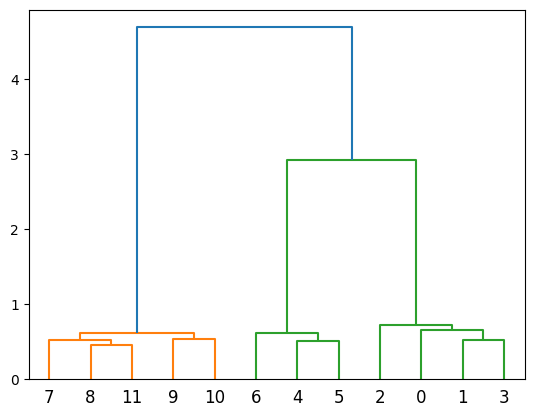

cluster:  3   ['test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230907_223245_s1.wav_SPEAKER_00__0_20230908_174952.wav', 'test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230907_223255_s1.wav_SPEAKER_00__1_20230908_175101.wav', 'test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230907_223305_s1.wav_SPEAKER_00__1_20230908_175112.wav', 'test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230907_223315_s1.wav_SPEAKER_00__0_20230908_175049.wav'] 

cluster:  2   ['test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230907_223415_s2.wav_SPEAKER_00__1_20230908_175057.wav', 'test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230907_223425_s2.wav_SPEAKER_00__1_20230908_175053.wav', 'test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230907_223435_s2.wav_SPEAKER_00__1_20230908_175108.wav'] 

cluster:  1   ['test/audio/temp/speaker_segements/crop_at_end_recorded_audio_20230908_133604_s3.wav_SPEAKER_00__2_20230

In [25]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from models.cluster_point import ClusterPoint

CLUSTER_ROOT = 'test/audio/temp/speaker_segements/'#'enhanced_audio/test_clips/'

def init_embeddings_cluster(CLUSTER_ROOT, embedding_model):
    cluster_point = ClusterPoint()
    cluster_files = os.listdir(CLUSTER_ROOT) 
    embeddings_dict = {}
    for i, file in enumerate(cluster_files):
        file_path = os.path.join(CLUSTER_ROOT, file)
        print("i ", i)
        if file_path not in embeddings_dict:
            embeddings_dict[file_path] = pyannote.get_speaker_embedding_vector(embedding_model, file_path)

    embedding_arrays = np.array(list(embeddings_dict.values()))
    cosine_similarity_matrix = cosine_similarity(embedding_arrays, embedding_arrays)

    # Compute linkage matrix
    linkage_matrix = linkage(1 - cosine_similarity_matrix, method='ward')

    # Create a dendrogram
    dendrogram(linkage_matrix)

    # Plot the dendrogram (optional)
    import matplotlib.pyplot as plt
    plt.show()

        # Set a threshold or number of clusters based on your visual inspection
    threshold = 1.4  # Adjust this value as needed

    # Cut the dendrogram to obtain cluster labels
    cluster_labels = fcluster(linkage_matrix, t=threshold, criterion='distance')
    cluster_labels

    # Create a dictionary to associate file names with cluster labels
    clustered_data = {}
    clustered_embeddings = {}
    for i, (file_name, embedding) in enumerate(embeddings_dict.items()):
        cluster_label = cluster_labels[i]
        if cluster_label not in clustered_data:
            clustered_data[cluster_label] = []
            clustered_embeddings[cluster_label] = []
        clustered_data[cluster_label].append(file_name)
        clustered_embeddings[cluster_label].append(embedding)
        
        #system_utils.delete_specific_file(file_name)

    # Now, clustered_data contains clusters as keys and lists of file names as values
    for i in clustered_data:
        print("cluster: ", i, " ",clustered_data[i],"\n")
    
    return clustered_embeddings

clustered_embeddings = init_embeddings_cluster(CLUSTER_ROOT, embedding_model)

array([1, 1, 1], dtype=int32)

cluster:  1   ['enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__1_20230906_200743.wav', 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__1_20230906_200819.wav', 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__2_20230906_200807.wav'] 



In [22]:
# Compute cosine similarity
#similarity = cosine_similarity([clustered_embeddings[0]], [clustered_embeddings[1]])
emb_to_compare = clustered_embeddings[2]
emb_to_compare_length = len(emb_to_compare)
# The similarity variable now contains the cosine similarity value between array1 and array2
#print("Cosine Similarity:", similarity[0][0])

for i, (k, embs) in enumerate(clustered_embeddings.items()):
    print(file)
    #print(i,"",clustered_embeddings[k],"\n")
    similarity = cosine_similarity(np.array(list(clustered_embeddings[1])), np.array(list(clustered_embeddings[2])))
    print("Cosine Similarity:", similarity[0][0])
    break

1
Cosine Similarity: 0.4007475


In [24]:
#import random

#def get_embedding_sample(embedding_list_1, embedding_list_2):
#    l_3 = []
#    # Check if list_1 is bigger than list_2
#    if len(embedding_list_1) > len(embedding_list_2):
#        # Randomly split list_1 into two parts of the same length as list_2
#        l_3 = random.sample(embedding_list_1, len(embedding_list_2))  # Randomly select elements from list_1
#    else:
#        # Randomly grow list_1 to the size of list_2 based on its own elements
#        l_3 = random.choices(embedding_list_1, k=len(embedding_list_2)) 
#    return l_3

In [34]:
file_path = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_01__3_20230906_200923.wav'
#file_path = 'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__3_20230906_200854.wav'

def get_speaker_key(embedding_model, clustered_embeddings_dict, file_path):
    # Compute cosine similarity for each pair of arrays
    dict_after_clustering = {}

    dict_after_clustering[2] = pyannote.get_speaker_embedding_vector(embedding_model, file_path)#clustered_embeddings[3]
    similarities = []
    #identity_cluster = -1
    #hihghest_similarity_score = -1
    for _, (_, v) in enumerate(dict_after_clustering.items()):
        for _, (_, v_1) in enumerate(clustered_embeddings_dict.items()):
            v = np.array(list(v))
            v_1 = np.array(list(v_1))
            if len(v.shape) < 2:
                v = v.reshape(1, -1)
            if len(v_1.shape) < 2:
                v_1 = v_1.reshape(1, -1)
            print(f"shape : {len(v_1.shape)}")
            print(f" v shape {v.reshape(1, -1).shape} - v_1 shape {v_1.shape}")
            
            similarity = cosine_similarity(v, v_1)[0][0]
            similarities.append(similarity)

    # The similarities list now contains the cosine similarities for each pair of arrays
    print("Cosine Similarities:", similarities)
    max_index = np.argmax(similarities)
    if similarities[max_index] < 0.6:
        max_index = -1 
    print("speaker ", max_index)
    return max_index

get_speaker_key(embedding_model, clustered_embeddings, file_path)



shape : 2
 v shape (1, 512) - v_1 shape (3, 512)
Cosine Similarities: [0.2108496]
speaker  -1


-1

In [24]:
audio_utils.speach_activity_detection('enhanced_audio/enhanced/recorded_audio_20230906_164623.wav')

,file_name,start,stop,total_length
0,recorded_audio_20230906_164623.wav,1.026,4.512,9.985
1,recorded_audio_20230906_164623.wav,5.175,9.985,9.985


In [30]:
test = 'enhanced_audio/enhanced/recorded_audio_20230906_164623.wav'
diarization = pyannote.get_diarization_speaker_info_df(pyannote_pipeline, test)
diarization

,start,stop,speaker
0,1.00,3.51,SPEAKER_00
1,3.51,9.99,SPEAKER_01


In [31]:
test ='enhanced_audio/enhanced/recorded_audio_20230906_164623.wav' #'enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__2_20230906_191648.wav'
transcript_obj = whisper.get_transcription_object(transcription_model, test)
transcript_obj[1]


,id,seek,start,end,text,temperature,avg_logprob,compression_ratio,no_speech_prob
0,0,0,0.0,5.0,"a very, very respected school.",0.0,-0.459736,1.243243,0.136985
1,1,0,5.0,8.0,"Yeah, my wife and I, we lived in Plano for fi...",0.0,-0.459736,1.243243,0.136985
2,2,0,8.0,9.0,and my wife's from Houston.,0.0,-0.459736,1.243243,0.136985
3,3,0,9.0,10.0,"I mean, she, we made it.",0.0,-0.459736,1.243243,0.136985


In [32]:
all_overlaps = transcription_without_overlapping_speakers(diarization, transcript_obj)
all_overlaps

,id,start,end,text,speaker_start,speaker_end,speaker,max_start,min_end,overlap_duration
0,0,0.0,5.0,"a very, very respected school.",1.00,3.51,SPEAKER_00,1.0,3.51,2.51
2,1,5.0,8.0,"Yeah, my wife and I, we lived in Plano for fi...",3.51,9.99,SPEAKER_01,5.0,8.00,3.00
3,2,8.0,9.0,and my wife's from Houston.,3.51,9.99,SPEAKER_01,8.0,9.00,1.00
4,3,9.0,10.0,"I mean, she, we made it.",3.51,9.99,SPEAKER_01,9.0,9.99,0.99


In [ ]:


import librosa
import torch
import os

sample_rate = 16000
# Define parameters
window_size = int(sample_rate * 0.03)  # 30 ms window size
overlap = int(sample_rate * 0.015)  # 15 ms overlap

# Define and load a pre-trained d-vector extraction model
d_vector_model = torch.load('d_vector_model.pth')

# Directory containing your audio clips
audio_dir = 'enhanced_audio/chunks/'

# List of audio clip filenames
audio_files = os.listdir(audio_dir)

# Initialize a dictionary to store d-vectors for each clip
d_vectors_dict = {}

for audio_file in audio_files:
    # Load the audio clip
    audio_path = os.path.join(audio_dir, audio_file)
    audio, sample_rate = librosa.load(audio_path, sr=None)
    print(sample_rate)

    # Divide the audio into overlapping frames
    frames = librosa.util.frame(audio, frame_length=window_size, hop_length=overlap)

    # Extract MFCC features from each frame
    mfcc_features = librosa.feature.mfcc(y=frames, sr=sample_rate)

    # Extract d-vectors from MFCC features
    d_vectors = []
    for frame_mfcc in mfcc_features.T:
        frame_mfcc = torch.Tensor(frame_mfcc)
        d_vector = d_vector_model(frame_mfcc)
        d_vectors.append(d_vector)

    # Perform pooling (e.g., mean pooling) on d-vectors within the clip
    pooled_d_vector = torch.mean(torch.stack(d_vectors), dim=0)

    # Store the pooled d-vector in the dictionary
    d_vectors_dict[audio_file] = pooled_d_vector


In [17]:
import librosa 
from scipy.spatial.distance import cdist

audio_1 = 'archive/16000_pcm_speeches/audio/Benjamin_Netanyau/10.wav'
audio_2 = 'archive/16000_pcm_speeches/audio/Jens_Stoltenberg/30.wav'
num_mfcc = 13
#embedding = pyannote.get_embedding_model(PYANNOTE_ACCESS_TOKEN)
y_1, sr_1 = librosa.load(audio_1, sr=None)
y_2, sr_2 = librosa.load(audio_2, sr=None)

mfccs_1 = librosa.feature.mfcc(y=y_1, sr=sr_1, n_mfcc=num_mfcc)
mfccs_2 = librosa.feature.mfcc(y=y_2, sr=sr_2, n_mfcc=num_mfcc)

mfccs_1 = mfccs_1.T
mfccs_2 = mfccs_2.T

eulr = 1 - cdist(mfccs_1, mfccs_2, metric="cosine")[0,0]
eulr

#diff = pyannote.embedding_cosine_similarity(embedding, audio_1, audio_2)
#diff

0.9946786365975026

In [ ]:
import os
import src.utils.audio_utils as audio_utils
SPEAKER_CLUSTER_LOCATION = 'enhanced_audio/test_clips/'

content = os.listdir('enhanced_audio/chunks/')
for path in content:
    print(path)
    path_item = os.path.join('enhanced_audio/chunks/', path)
    audio_utils.enhance_audio_signal(path_item, f'enhanced_audio/enhanced/{path}')
    diarization = pyannote.get_diarization_speaker_info_df(pyannote_pipeline, f'enhanced_audio/enhanced/{path}')
    pyannote.cluster_audio_chunks(diarization, SPEAKER_CLUSTER_LOCATION, f'enhanced_audio/enhanced/{path}')


In [15]:
from pyannote.audio.pipelines import OverlappedSpeechDetection
from pyannote.audio import Model

dotenv_path = 'venv/env_variables.env'
TOKEN = pyannote.get_pyannote_access_token(dotenv_path)
model = Model.from_pretrained("pyannote/segmentation", 
                              use_auth_token=TOKEN)
HYPER_PARAMETERS = {
  # onset/offset activation thresholds
  "onset": 0.5, "offset": 0.5,
  # remove speech regions shorter than that many seconds.
  "min_duration_on": 0.0,
  # fill non-speech regions shorter than that many seconds.
  "min_duration_off": 0.0
}

pipeline = OverlappedSpeechDetection(segmentation=model)
pipeline.instantiate(HYPER_PARAMETERS)
osd = pipeline("enhanced_audio/test_clips/recorded_audio_crop_SPEAKER_00__2_20230906_182427.wav")


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.7. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\adamb\.cache\torch\pyannote\models--pyannote--segmentation\snapshots\ea322af152f0db03fcd5fd3d170ca28dc14c72a9\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cpu. Bad things might happen unless you revert torch to 1.x.


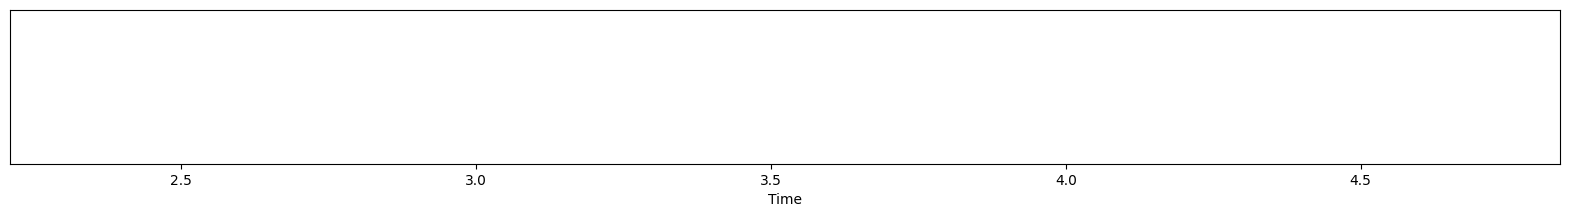

In [16]:
osd

In [ ]:

folder_path = 'enhanced_audio/chunks/'
folder_contents = os.listdir(folder_path)
diarization_dict = {}
global_counter = 0.0
for i, item in enumerate(folder_contents):
    item_path = os.path.join(folder_path, item)
    audio_utils.enhance_audio_signal(item_path, f'enhanced_audio/enhanced/{item}')
    diarization_dict = pyannote.get_diarization_speaker_info_df(pyannote_pipeline, f'enhanced_audio/enhanced/{item}')
    print(f'file: {item} dict: {diarization_dict}\n')
    for _, row in diarization_dict.iterrows():
        audio_utils.crop_wav(item_path, f'enhanced_audio/test_clips/{item}_{row["speaker"]}_{(float(row["stop"]) + global_counter)}.wav', float(row["start"]), float(row["stop"]))
    #audio_utils.c
    global_counter += 10



In [ ]:
embedding_model = pyannote.get_embedding_model(PYANNOTE_ACCESS_TOKEN)

In [ ]:
import os 
from pydub import AudioSegment

cluster_file = 'enhanced_audio/test_clips/'
folder_contents = os.listdir(cluster_file)
speakers_embeddings_list = {}
for i, item in enumerate(folder_contents):
    item_path = os.path.join(cluster_file, item)
    print("============> ",item_path)
    #audio = AudioSegment.from_file(item_path)
    #length_in_seconds = len(audio) / 1000.0
    
    #if length_in_seconds >= 1:
    #    print(length_in_seconds)
    speaker_embedding = pyannote.get_speaker_embedding_vector(embedding_model, item_path)
    #speaker_embedding = mfcc_vectors[i]
    speakers_embeddings_list[item_path] = speaker_embedding

In [ ]:
from scipy.spatial.distance import cdist
from pydub import AudioSegment

cluster_file = 'enhanced_audio/test_clips/'
folder_contents = os.listdir(cluster_file)
seen = []
comp = {}
for i, item in enumerate(folder_contents):
    item_path = os.path.join(cluster_file, item)
    #emb_1 = speakers_embeddings_list[item_path]
    folder_contents_y = os.listdir(cluster_file)
    for y, item_y in enumerate(folder_contents_y):
        current_path = os.path.join(cluster_file, item_y)
        audio = AudioSegment.from_file(item_path)
        length_in_seconds = len(audio) / 1000.0
        if (item_y in seen) or (i == y) or (length_in_seconds < 1):
            pass

        else:
            #emb_1 = pyannote.get_speaker_embedding_vector(embedding_model, item_path)
            #emb_2 = pyannote.get_speaker_embedding_vector(embedding_model, current_path)
            #similarity = 1 - cdist(embedding1.reshape(1, -1), embedding2.reshape(1, -1), metric="cosine")[0,0]
            similarity = pyannote.embedding_cosine_similarity(embedding_model, item_path, current_path)
            if similarity > 0.65:
                if item_path not in comp:
                    comp[item_path] = []
                    comp[item_path].append(current_path)
                else:
                    comp[item_path].append(current_path)
    seen.append(item_path)
    #system_utils.delete_specific_file(item_path)

##### Diarization based uterrances

In [31]:
import librosa
import numpy as np
import os
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

num_mfcc = 13  # Number of MFCC coefficients to extract
frame_length = 25  # Frame length in milliseconds
hop_length = 10    # Hop length in milliseconds

def extract_mfcc(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc, hop_length=int(hop_length * sr / 1000),
                                 n_fft=int(frame_length * sr / 1000))

    # Transpose the MFCC matrix to have time frames as rows
    mfccs = mfccs.T

    return mfccs

audio_dir = 'enhanced_audio/chunks/'  # Replace with the directory containing your audio files

mfcc_file_pairs = []

for filename in os.listdir(audio_dir):
    if filename.endswith('.wav'):
        audio_file = os.path.join(audio_dir, filename)
        mfcc = extract_mfcc(audio_file)
        #print(f"mfcc len {len(mfcc)}")
        #mfcc_file_pairs.append((mfcc, audio_file))

        for i, vector in enumerate(mfcc):
            mfcc_file_pairs.append((vector, audio_file))

# Concatenate the MFCC vectors into a single NumPy array
mfcc_data = np.vstack([pair[0] for pair in mfcc_file_pairs])

In [ ]:
mfcc_file_pairs[0][1]

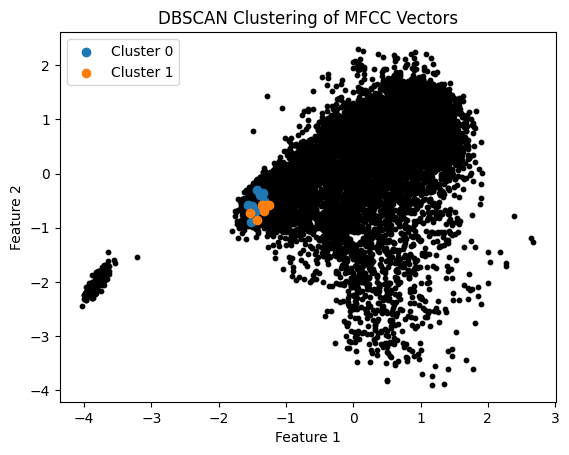

In [37]:



#Concatenate the MFCC vectors into a single NumPy array, which will serve as the input data for DBSCAN:
#mfcc_data = np.vstack(mfcc_vectors)


scaler = StandardScaler()
mfcc_data_normalized = scaler.fit_transform(mfcc_data)

eps = 0.55  # Adjust as needed
min_samples = 5  # Adjust as needed

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(mfcc_data_normalized)
#print(len(labels))


# Create a dictionary to map labels to audio files
label_to_audio_file = {}

for i, label in enumerate(labels):
    #print(f"index {i}")
    audio_file = mfcc_file_pairs[i][1]
    #print("audio ___> ",audio_file)
    if label in label_to_audio_file:
        label_to_audio_file[label].append(audio_file)
    else:
        label_to_audio_file[label] = [audio_file]

#for label, audio_file in zip(labels, [pair[1] for pair in mfcc_file_pairs]):
#    print("in label ", label)
#    if label in label_to_audio_file:
        
#        label_to_audio_file[label].append(audio_file)
#    else:
#        label_to_audio_file[label] = [audio_file]

# Plot the clustered data
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == -1:
        # Plot noise points in black
        plt.scatter(mfcc_data_normalized[labels == label, 0], mfcc_data_normalized[labels == label, 1], c='black', marker='o', s=10)
    else:
        # Plot data points belonging to clusters with different colors
        plt.scatter(mfcc_data_normalized[labels == label, 0], mfcc_data_normalized[labels == label, 1], label=f'Cluster {label}')

plt.legend()
plt.title('DBSCAN Clustering of MFCC Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [38]:
#label_to_audio_file[0]

# Use numpy's unique function with return_counts=True
unique_elements, frequencies = np.unique(label_to_audio_file[0], return_counts=True)

# Create a dictionary to store the frequencies
frequency_dict = dict(zip(unique_elements, frequencies))

# Sort the dictionary by frequency in descending order
sorted_frequency_dict = dict(sorted(frequency_dict.items(), key=lambda item: item[1], reverse=True))

# Print the frequencies in descending order
for element, frequency in sorted_frequency_dict.items():
    print(f"{element}: {frequency}")

enhanced_audio/chunks/recorded_audio_20230905_205840.wav: 3
enhanced_audio/chunks/recorded_audio_20230905_205830.wav: 2
enhanced_audio/chunks/recorded_audio_20230905_205810.wav: 1
enhanced_audio/chunks/recorded_audio_20230905_205910.wav: 1
enhanced_audio/chunks/recorded_audio_20230905_205911.wav: 1


In [ ]:



#Concatenate the MFCC vectors into a single NumPy array, which will serve as the input data for DBSCAN:
mfcc_data = np.vstack(mfcc_vectors)


scaler = StandardScaler()
mfcc_data_normalized = scaler.fit_transform(mfcc_data)

eps = 0.7  # Adjust as needed
min_samples = 5  # Adjust as needed

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(mfcc_data_normalized)



# Plot the clustered data
unique_labels = np.unique(labels)
for label in unique_labels:
    if label == -1:
        # Plot noise points in black
        plt.scatter(mfcc_data_normalized[labels == label, 0], mfcc_data_normalized[labels == label, 1], c='black', marker='o', s=10)
    else:
        # Plot data points belonging to clusters with different colors
        plt.scatter(mfcc_data_normalized[labels == label, 0], mfcc_data_normalized[labels == label, 1], label=f'Cluster {label}')

plt.legend()
plt.title('DBSCAN Clustering of MFCC Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.decomposition import PCA
# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
X_standardized = scaler.fit_transform(list(speakers_embeddings_list.values()))



dict_ = {}
item_1 = X_standardized#list(speakers_embeddings_list.values())[0]
len(X_standardized[0])
#dict_[len(dict_)] = item_1
#for key, embedding in X_standardized:#speakers_embeddings_list.items():
#    distance = 1 - cdist(item_1.reshape(1, -1), embedding.reshape(1, -1), metric="cosine")[0,0]
    #sim = 1 - pyannote.embedding_cosine_similarity(speakers_embeddings_list[0], dict_[i])
#    print(f"{key} sim with index {0}, similarity: {distance}")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
item_1 = item_1 * 100000
X_standardized = scaler.fit_transform(list(speakers_embeddings_list.values()))
X_standardized

# Create the PCA model with 95% variance retention
pca = PCA(n_components=0.95)

# Fit the PCA model to the standardized data
X_pca = pca.fit_transform(X_standardized)
X_pca

#item_1.reshape(1, -1)

##### transcription based uterrances

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Create a DBSCAN instance
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to your data
clusters = dbscan.fit_predict(list(speakers_embeddings_list.values()))
clusters

In [ ]:
reduced_audio